In [2]:
import pandas as pd
import numpy as np
import numpy.random as random
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import minmax_scale
#from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
import math
import matplotlib
import matplotlib.pyplot as plt

## Leitura dos dados

In [52]:
dados_probe = pd.read_excel('probe.xlsx')

## Separando somente dados de luminosidade

In [53]:
luminosidade = dados_probe['Luminosidade']

## Criando a base padrão ouro

In [54]:
padrao_ouro = np.zeros((len(luminosidade)-6, 8))

In [55]:
for i in range(len(luminosidade)-6):
    for j in range(7):
        padrao_ouro[i][j] = luminosidade[i+j]

## Novos Testes - Com novo algoritmo (Guilherme)

In [56]:
base_cagada = padrao_ouro.copy()

In [57]:
ruido_desv = padrao_ouro.std(1).mean()*0.5

In [59]:
ruido_med = np.mean(luminosidade)

In [61]:
ruido_min, ruido_max = ruido_med - 3* ruido_desv, ruido_med + 3* ruido_desv

In [62]:
for i in range(len(base_cagada)):
    base_cagada[i][3] = random.uniform(ruido_min, ruido_max)
    base_cagada[i][7] = 1

In [63]:
copia_base_cagada = base_cagada.copy()

In [64]:
corte = math.floor(len(copia_base_cagada))

In [66]:
base_completa = np.append(padrao_ouro, copia_base_cagada[0:corte], axis=0)

## Cross Validation (Novo Teste)

In [67]:
np.random.shuffle(base_completa)

In [68]:
base_completa[:,0:7] = base_completa[:,0:7] - base_completa[:,[3]*7]

In [69]:
treino, teste = train_test_split(base_completa, test_size=0.3)

In [70]:
treino_x = treino[:,0:7]
treino_y = treino[:,7]

teste_x = teste[:, 0:7] 
teste_y = teste[:,7]

In [71]:
gaussian_model = GaussianNB()
gaussian_model.fit(treino_x, treino_y)

GaussianNB()

In [72]:
gaussian_model.score(teste_x, teste_y)

0.7860374626730613

# Criando função para executar com variações do ruído

In [73]:
def outlier_detection(porcentagem_ruido, desvio_padrao):
    luminosity = probe_data['Luminosidade']
    gold_std = np.zeros((len(luminosity)-6, 8), dtype=int)

    for i in range(len(luminosity)-6):
        for j in range(7):
            gold_std[i][j] = luminosity[i+j]

    noisy_data = gold_std.copy()

    for i in range(len(noisy_data)):
        noisy_data[i][3] += random.normal(scale=desvio_padrao)
        noisy_data[i][7] = 1

    np.random.shuffle(noisy_data)
    cut = math.floor(porcentagem_ruido * len(noisy_data))
    dataset = np.append(gold_std, noisy_data[0:cut], axis=0)
    np.random.shuffle(dataset)
    train, test = train_test_split(dataset, test_size=0.3)
    train_x = train[:,0:7]
    train_y = train[:,7]

    test_x = test[:, 0:7] 
    test_y = test[:,7]
    gaussian_model = GaussianNB()
    multinomial_model = MultinomialNB()
    complement_model = ComplementNB()
    bernoulli_model = BernoulliNB()
    
    gaussian_model.fit(train_x, train_y)
    #multinomial_model.fit(train_x, train_y)
    #complement_model.fit(train_x, train_y)
    bernoulli_model.fit(train_x, train_y)
    
    gaussian_score = gaussian_model.score(test_x, test_y)
    #multinomial_score = multinomial_model.score(test_x, test_y)
    #complement_score = complement_model.score(test_x, test_y)
    bernoulli_score = bernoulli_model.score(test_x, test_y)
    
    return gaussian_score, bernoulli_score

In [74]:
probe_data = pd.read_excel('probe.xlsx')

In [75]:
gaussian_scores = []
bernoulli_scores = []
std_devs = np.arange(50000, 1000001, 50000)

for idx, std_dev in enumerate(std_devs):
    gaussian_score, bernoulli_score = outlier_detection(0.2, std_dev)
    print(f'Finished iteration {idx+1} with deviation: {round(std_dev,1)}' +
        f'\n\t gaussian_score: {gaussian_score}' +
        f'\n\t bernoulli_score: {bernoulli_score}')
    gaussian_scores.append(gaussian_score)
    bernoulli_scores.append(bernoulli_score)
    #scores.append(current_score)

Finished iteration 1 with deviation: 50000
	 gaussian_score: 0.8346655606666163
	 bernoulli_score: 0.8337229469874067
Finished iteration 2 with deviation: 100000
	 gaussian_score: 0.8829650855893221
	 bernoulli_score: 0.8329311514968705
Finished iteration 3 with deviation: 150000
	 gaussian_score: 0.9610889073222231
	 bernoulli_score: 0.8365130834778675
Finished iteration 4 with deviation: 200000
	 gaussian_score: 0.9675363848880175
	 bernoulli_score: 0.8344016288364376
Finished iteration 5 with deviation: 250000
	 gaussian_score: 0.9735691124349597
	 bernoulli_score: 0.8328557424025338
Finished iteration 6 with deviation: 300000
	 gaussian_score: 0.9776412035291456
	 bernoulli_score: 0.8324032878365131
Finished iteration 7 with deviation: 350000
	 gaussian_score: 0.9804690445667748
	 bernoulli_score: 0.8288213558555162
Finished iteration 8 with deviation: 400000
	 gaussian_score: 0.9817132946233316
	 bernoulli_score: 0.8333459015157227
Finished iteration 9 with deviation: 450000
	 gau

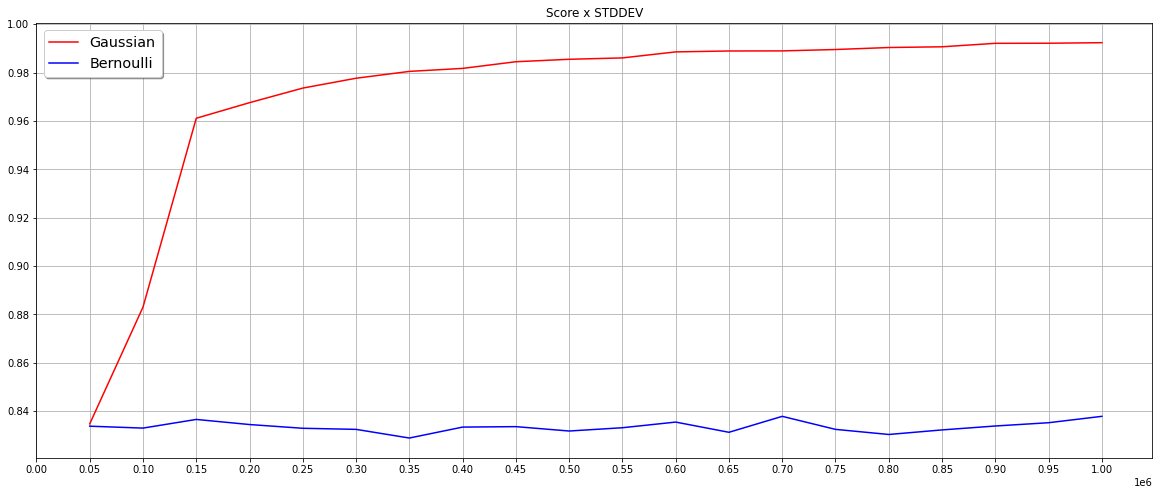

In [76]:
fig, ax = plt.subplots(figsize=(20,8))
#plt.figure(figsize=(20,5))
#plt.grid()
#plt.title('Score x STDDEV')
ax.grid()
ax.set_title('Score x STDDEV')
ax.plot(std_devs, gaussian_scores, 'r', label="Gaussian")
ax.plot(std_devs, bernoulli_scores, 'b', label="Bernoulli")
plt.xticks(np.arange(1000001, step=50000))
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

In [198]:
scores = []
noise_percentages = np.linspace(0.1,1,10)

for idx, noise in enumerate(noise_percentages):
    gaussian_score, bernoulli_score = outlier_detection(noise)
    print(f'Finished iteration {idx+1} with noise: {round(noise,1)}' +
        f'\n\t gaussian_score: {gaussian_score}' +
        f'\n\t bernoulli_score: {bernoulli_score}')
    #scores.append(current_score)

Finished iteration 1 with noise: 0.1
	 gaussian_score: 0.9958045409674235
	 bernoulli_score: 0.9087282000658111
Finished iteration 2 with noise: 0.2
	 gaussian_score: 0.9932885906040269
	 bernoulli_score: 0.8371917653268984
Finished iteration 3 with noise: 0.3
	 gaussian_score: 0.9902895726019769
	 bernoulli_score: 0.7686203536126966
Finished iteration 4 with noise: 0.4
	 gaussian_score: 0.9865231723870468
	 bernoulli_score: 0.7145950488009825
Finished iteration 5 with noise: 0.5
	 gaussian_score: 0.9868488522908937
	 bernoulli_score: 0.6689892317437336
Finished iteration 6 with noise: 0.6
	 gaussian_score: 0.9853236433560502
	 bernoulli_score: 0.6234482368577327
Finished iteration 7 with noise: 0.7
	 gaussian_score: 0.9832060256034919
	 bernoulli_score: 0.5885609347137573
Finished iteration 8 with noise: 0.8
	 gaussian_score: 0.9828067264912148
	 bernoulli_score: 0.6864741221124601
Finished iteration 9 with noise: 0.9
	 gaussian_score: 0.9825685233253161
	 bernoulli_score: 0.553258876

## Plotando a distribuição dos dados

<AxesSubplot:>

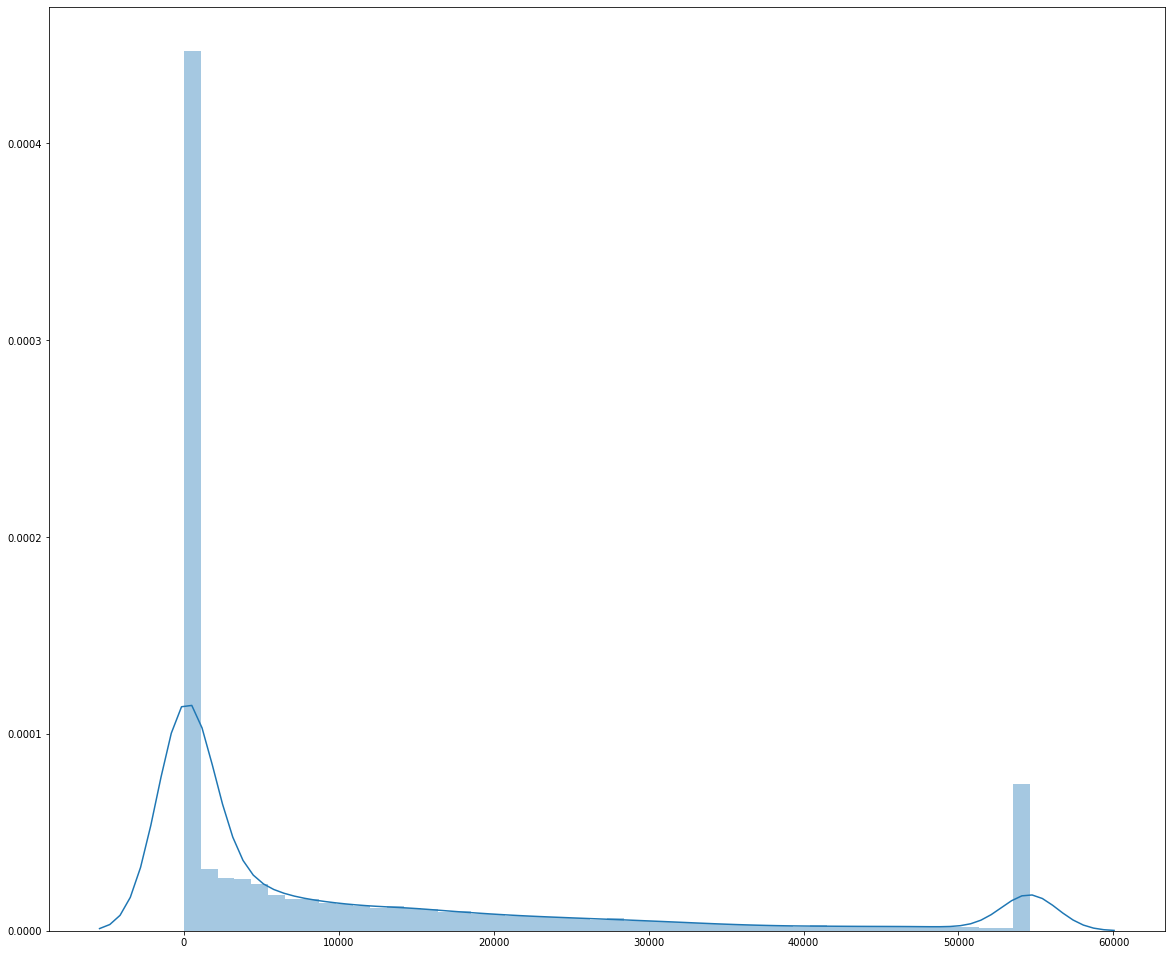

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

list_luminosidade = list(probe_data['Luminosidade'])
fig, ax = plt.subplots(figsize=(20,17))
sns.distplot(list_luminosidade, ax=ax)

## Plotando os Resultados

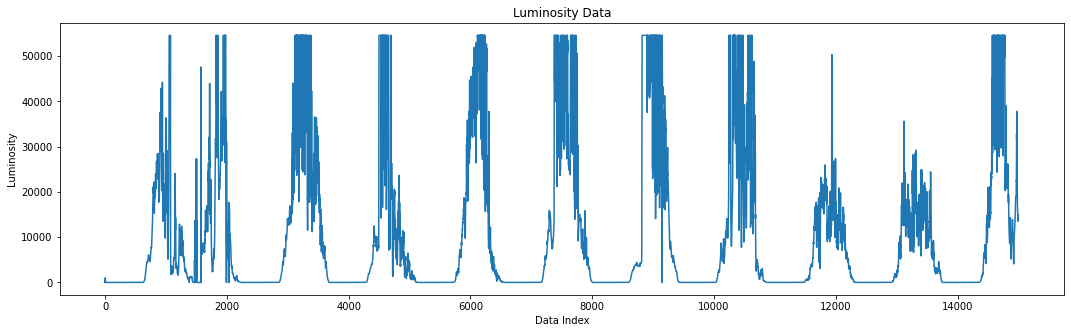

In [79]:
plt.figure(figsize=(18,5))
plt.title('Luminosity Data')
plt.xlabel('Data Index')
plt.ylabel('Luminosity')
plt.plot(range(len(probe_data['Luminosidade'].head(15000))), probe_data['Luminosidade'].head(15000))

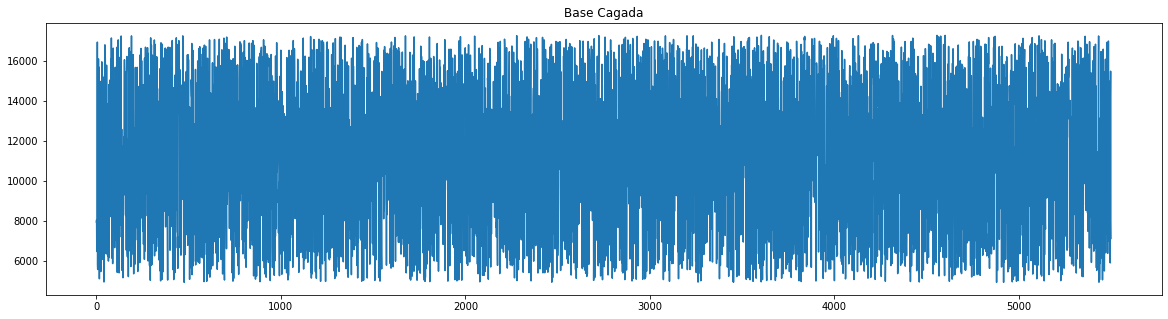

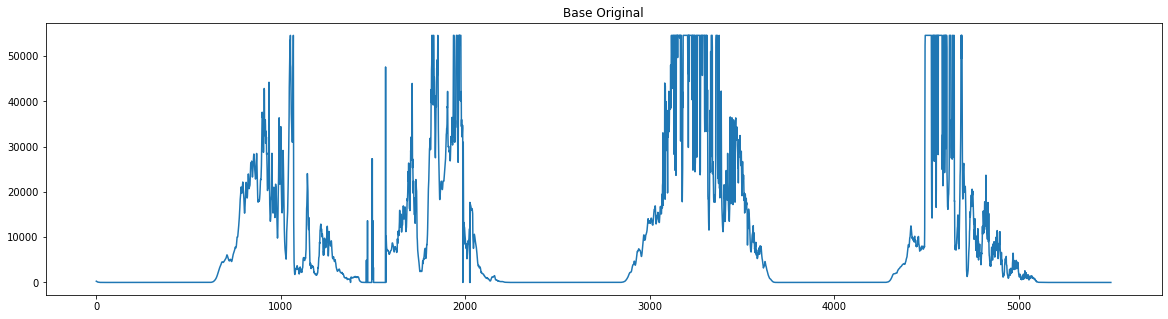

In [80]:
flat_base = base_cagada[:, 3].flatten()[0:5500]
plt.figure(figsize=(20,5))
plt.title('Base Cagada')
plt.plot(range(len(flat_base)), flat_base)

flat_base = padrao_ouro[:, 3].flatten()[0:5500]
plt.figure(figsize=(20,5))
plt.title('Base Original')
plt.plot(range(len(flat_base)), flat_base)